## Load Required files

In [1]:
import requests
from pandas.io.json import json_normalize
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
#------------------------Read in data ---------------------------
#SA Cummulative
df1 = pd.read_csv('./../data/external/global_data.csv')
df1 = df1[df1.Country=='South Africa']
df = pd.read_csv('./../data/external/SA_hourly_update.csv')

#Provincial cummulative
df_day=pd.read_csv('./../data/external/provincial_cumulative.csv')

# Commulative death per province 

df_death = pd.read_csv('./../data/external/provincial_death.csv')

#Update for the most recent  hours: SA Cases
df.tail()

,Unnamed: 0,cases,todayCases,deaths,todayDeaths,recovered,active,critical,timestamp
1301,1301,10652,637,206,12,4357,6089,77,2020-05-11T16:00:00.223Z
1302,1302,10652,637,206,12,4357,6089,77,2020-05-11T17:00:00.228Z
1303,1303,10652,637,206,12,4357,6089,77,2020-05-11T18:00:00.227Z
1304,1304,10652,637,206,12,4357,6089,77,2020-05-11T19:00:00.222Z
1305,1305,10652,637,206,12,4357,6089,77,2020-05-11T20:00:00.229Z


In [15]:
df_day.describe()

,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,277.171875,73.453125,827.968750,478.531250,19.656250,20.90625,11.328125,16.968750,1129.921875,21.437500,2878.140625
std,363.160053,48.477430,615.987991,437.699722,15.315952,17.92818,9.423130,14.419969,1447.044139,34.005543,2881.162672
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,12.000000,188.250000,53.750000,3.500000,7.25000,1.500000,3.000000,97.250000,0.000000,370.000000
50%,64.500000,93.500000,798.000000,399.500000,22.500000,20.00000,15.000000,16.500000,528.000000,0.000000,1968.500000
75%,499.750000,111.000000,1310.750000,846.500000,30.250000,24.25000,17.000000,28.000000,1537.500000,24.500000,4407.250000
max,1356.000000,135.000000,1971.000000,1372.000000,54.000000,63.00000,30.000000,50.000000,5621.000000,117.000000,10652.000000


The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.



In [4]:
#Summing per column
tot_cases = df1.TotalConfirmed.sum()
nw_cases = df1.NewConfirmed.sum()
tot_deaths = df1.TotalDeaths.sum()
new_deaths = df1.NewDeaths.sum()
tot_recover = df1.TotalRecovered.sum()
new_recover = df1.NewRecovered.sum()
diff = tot_cases - nw_cases
diff2 = tot_recover - new_recover
diff3 = tot_deaths - new_deaths 

#Separating columns

#Corona  cases: Total and New
df_tot_cases = df1.loc[:,['Country','TotalConfirmed']].sort_values(by='TotalConfirmed', ascending=False)
df_new_cases = df1.loc[:,['Country','NewConfirmed']]

#Death Cases: Total and New 
df_tot_death = df1.loc[:,['Country','TotalDeaths']]
df_new_death = df1.loc[:,['Country','NewDeaths']]

#Recovery cases: Total and new
df_tot_recover = df1.loc[:,['Country','TotalRecovered']]
df_new_recover = df1.loc[:,['Country','NewRecovered']]
                 

In [5]:
#Drop unwanted columns
# Provincial cases dataset
df_day = df_day.drop(['source','Unnamed: 0','YYYYMMDD'],axis = 1)
df_day = df_day.dropna()
# Provincial cases dataset
df_death = df_death.drop(['source','Unnamed: 0','YYYYMMDD'],axis = 1)
df_death = df_death.dropna()

In [6]:
#SA commulative data graph

fig = go.Figure()
fig.add_trace(go.Scatter(x = df.timestamp,y= df.active, name = 'Active Cases in SA'))
fig.update_layout(title = 'Commulative confirmed cases in SA as 17/03/2020')
fig.show()

Total Cases in SA: 10015    Recoveries: 4173    Fatalities 194


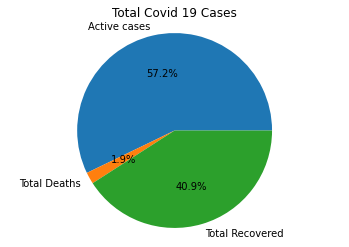

In [7]:
print('Total Cases in SA: {}    Recoveries: {}    Fatalities {}'.format(tot_cases,tot_recover,tot_deaths), sep='nl')
conv  = df.tail(1)
Tasks = [int(conv.active),int(conv.deaths),int(conv.recovered)]

my_labels = 'Active cases','Total Deaths','Total Recovered'
my_colors = ['lightblue','lightsteelblue','silver']
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Total Covid 19 Cases')
plt.axis('equal')
plt.show()

In [8]:
df_day.head()

,date,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,05-03-2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,07-03-2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,08-03-2020,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,09-03-2020,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,11-03-2020,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13


In [9]:
#Summing per column
tot_cases = df1.TotalConfirmed.sum()
nw_cases = df1.NewConfirmed.sum()
tot_deaths = df1.TotalDeaths.sum()
new_deaths = df1.NewDeaths.sum()
tot_recover = df1.TotalRecovered.sum()
new_recover = df1.NewRecovered.sum()
diff = tot_cases - nw_cases
diff2 = tot_recover - new_recover
diff3 = tot_deaths - new_deaths 

#Separating columns

#Corona  cases: Total and New
df_tot_cases = df1.loc[:,['Country','TotalConfirmed']].sort_values(by='TotalConfirmed', ascending=False)
df_new_cases = df1.loc[:,['Country','NewConfirmed']]

#Death Cases: Total and New 
df_tot_death = df1.loc[:,['Country','TotalDeaths']]
df_new_death = df1.loc[:,['Country','NewDeaths']]

#Recovery cases: Total and new
df_tot_recover = df1.loc[:,['Country','TotalRecovered']]
df_new_recover = df1.loc[:,['Country','NewRecovered']]
                 

In [10]:


fig = go.Figure(data=[
    go.Bar( name='GP',x=df_day.date, y=df_day.GP),
    go.Bar( name='WC',x=df_day.date, y=df_day.WC),
    go.Bar( name='KZ',x=df_day.date, y=df_day.KZN),
    go.Bar( name='EC',x=df_day.date, y=df_day.EC),
    go.Bar( name='NW',x=df_day.date, y=df_day.NW),
    go.Bar( name='NC',x=df_day.date, y=df_day.NC),
    go.Bar( name='MP',x=df_day.date, y=df_day.MP),
    go.Bar( name='LP',x=df_day.date, y=df_day.LP),
    go.Bar( name='FS',x=df_day.date, y=df_day.FS),
])
# Change the bar mode
fig.update_layout(barmode='stack',xaxis=dict(
    rangeslider=dict(
        visible = True)))
fig.update_layout(height=600, width=800, title_text="Confirmed Cases by provinces")
                            
fig.show()

In [11]:

fig = go.Figure(data=[
    go.Bar( name='GP',x=df_death.date, y=df_death.GP,marker_color=' cyan'),
    go.Bar( name='WC',x=df_death.date, y=df_death.WC,marker_color='darkblue'),
    go.Bar( name='KZ',x=df_death.date, y=df_death.KZN,marker_color='darkgoldenrod'),
    go.Bar( name='EC',x=df_death.date, y=df_death.EC,marker_color='grey'),
    go.Bar( name='NW',x=df_death.date, y=df_death.NW,marker_color='crimson'),
    go.Bar( name='NC',x=df_death.date, y=df_death.NC,marker_color='darksalmon'),
    go.Bar( name='MP',x=df_death.date, y=df_death.MP,marker_color='darkorchid'),
    go.Bar( name='LP',x=df_death.date, y=df_death.LP,marker_color='darkmagenta'),
    go.Bar( name='FS',x=df_death.date, y=df_death.FS,marker_color='darkgreen'),
])
# Change the bar mode
fig.update_layout(barmode='stack',xaxis=dict(
    rangeslider=dict(
        visible = True)))
fig.update_layout(height=600, width=800, title_text="Confirmed Fatalities by provinces")
                            
fig.show()

In [12]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(
        y=df_day['EC'],
        x=df_day.date,
        name= 'EC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['WC'],
        x=df_day.date,
        name= 'WC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['FS'],
        x=df_day.date,
        name= 'FS'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['GP'],
        x=df_day.date,
        name= 'GP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['KZN'],
        x=df_day.date,
        name= "KZN"
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['NW'],
        x=df_day.date,
        name= 'NW'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['LP'],
        x=df_day.date,
        name= 'LP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['MP'],
        x=df_day.date,
        name= 'MP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['NC'],
        x=df_day.date,
        name= 'NC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_day['UNKNOWN'],
        x=df_day.date,
        name='Unlocated'
    ))



fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="EC",
                     method="update",
                     args=[{"visible": [True, False, False, False,False, False, False,False, False, False]},
                           {"title": "Cumulative Confirmed Cases: Eastern Cape",
                            }]),
                dict(label="WC",
                     method="update",
                     args=[{"visible": [False,True,False,False,False,False,False,False,False,False]},
                           {"title": "Cumulative Confirmed Cases: Western Cape",
                          }]),
                dict(label="FS",
                     method="update",
                     args=[{"visible": [False,False,True,False,False,False,False,False,False,False]},
                           {"title": "Cumulative Confirmed Cases: Free State",
                          }]),
                dict(label="GP",
                     method="update",
                     args=[{"visible": [False,False,False,True,False,False,False,False,False,False]},
                           {"title": "Cumulative Confirmed Cases: Gauteng",
                          }]),
                dict(label="KZN",
                     method="update",
                     args=[{"visible": [False,False,False,False,True, False,False,False, False, False]},
                           {"title": "Cumulative Confirmed Cases: Kwa Zulu Natal",
                          }]),
                dict(label="NW",
                     method="update",
                     args=[{"visible": [False,False,False,False,False,True,False,False, False, False]},
                           {"title": "Cumulative Confirmed Cases: North West",
                          }]),
                dict(label="LP",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,True, False, False, False]},
                           {"title": "Cumulative Confirmed Cases: Limpopo",
                          }]),
                dict(label="MP",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,False,True,  False, False]},
                           {"title": "Cumulative Confirmed Cases: Mpumalanga",
                          }]),
                dict(label="NC",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,False,  False,True, False]},
                           {"title": "Cumulative Confirmed Cases: Northern Cape",
                          }]),
                 dict(label="Cumulative Confirmed Cases: UNKWNOWN",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,False,False, False,True]},
                           {"title": "Unlocated",
                          }]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Confirmed Cases by Province")

fig.show()



In [13]:

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(
        y=df_death['EC'],
        x=df_death.date,
        name= 'EC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['WC'],
        x=df_death.date,
        name= 'WC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['FS'],
        x=df_death.date,
        name= 'FS'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['GP'],
        x=df_death.date,
        name= 'GP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['KZN'],
        x=df_death.date,
        name= "KZN"
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['NW'],
        x=df_death.date,
        name= 'NW'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['LP'],
        x=df_death.date,
        name= 'LP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['MP'],
        x=df_death.date,
        name= 'MP'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['NC'],
        x=df_death.date,
        name= 'NC'
    ))
fig.add_trace(
    go.Scatter(
        y=df_death['UNKNOWN'],
        x=df_death.date,
        name='Unlocated'
    ))



fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="EC",
                     method="update",
                     args=[{"visible": [True, False, False, False,False, False, False,False, False, False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Eastern Cape",
                            }]),
                dict(label="WC",
                     method="update",
                     args=[{"visible": [False,True,False,False,False,False,False,False,False,False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Western Cape",
                          }]),
                dict(label="FS",
                     method="update",
                     args=[{"visible": [False,False,True,False,False,False,False,False,False,False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Free State",
                          }]),
                dict(label="GP",
                     method="update",
                     args=[{"visible": [False,False,False,True,False,False,False,False,False,False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Gauteng",
                          }]),
                dict(label="KZN",
                     method="update",
                     args=[{"visible": [False,False,False,False,True, False,False,False, False, False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Kwa Zulu Natal",
                          }]),
                dict(label="NW",
                     method="update",
                     args=[{"visible": [False,False,False,False,False,True,False,False, False, False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: North West",
                          }]),
                dict(label="LP",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,True, False, False, False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Limpopo",
                          }]),
                dict(label="MP",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,False,True,  False, False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Mpumalanga",
                          }]),
                dict(label="NC",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,False,  False,True, False]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Northern Cape",
                          }]),
                 dict(label="UNKWNOWN",
                     method="update",
                     args=[{"visible": [False, False,False,False,False, False,False,False, False,True]},
                           {"title": "Cumulative Confirmed Fatalities Cases: Unlocated",
                          }]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Confirmed Cases by Province")

fig.show()